In [58]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import yfinance as yf
from MCForecastTools import MCSimulation
from pathlib import Path
from datetime import datetime, date, timedelta
import datetime

%matplotlib inline

In [59]:
#Read the csv created from the risk parity module and create a dataframe with the tickers and weights in the portfolio


portfolio_path = Path("w.csv")
portfolio_df = pd.read_csv(portfolio_path)
portfolios_headers = ["Ticker", "Weight"]
portfolio_df.columns = portfolios_headers
portfolio_df['Weight'] = portfolio_df['Weight']
portfolio_df.head()

,Ticker,Weight
0,XLB,0.077869
1,XLC,0.071833
2,XLE,0.074294
3,XLF,0.080615
4,XLI,0.072601


In [61]:
#Creating lists of tickers and weights to be used in the Monte Carlo simulation

tickers = portfolio_df["Ticker"].tolist()
weights_list = portfolio_df["Weight"].tolist()
weights_list

[0.0778688415423715,
 0.0718325757028452,
 0.0742944832700899,
 0.0806150090847544,
 0.0726012924972901,
 0.0605804579541462,
 0.1148325770233443,
 0.1152190864163354,
 0.1745593905532063,
 0.0846547873559373,
 0.072941498599679]

In [62]:
# Getting todays date and the date 3 years ago to be used in the Monte Carlo simulation
today = date.today()
end = today - datetime.timedelta(days=3*365)
today = today.strftime("%Y-%m-%d")
end = end.strftime("%Y-%m-%d")



In [63]:
#Getting the open, close and daily return for the tickers in the portfolio and creating a dataframe with the data

dfs = []

for ticker in tickers:
    data = yf.download(ticker, end, interval='1d')
    open_df = pd.DataFrame(data['Open']).rename(columns={'Open': 'open'})
    adj_close_df = pd.DataFrame(data['Adj Close']).rename(columns={'Adj Close': 'close'})
    daily_return_df = pd.DataFrame(data['Adj Close'].pct_change()).rename(columns={'Adj Close': 'daily_return'})
    dfs.append(pd.concat([open_df, adj_close_df, daily_return_df], axis=1, keys=[ticker]*3))

data = pd.concat(dfs, axis=1)
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XLB                                XLC             \
                 open      close daily_return       open      close   
Date                                                                  
2020-05-08  51.990002  49.413048          NaN  51.549999  50.563866   
2020-05-11  51.610001  48.659798    -0.015244  51.540001  50.593117   
2020-05-12  51.849998  47.915966    -0.015286  52.049999  49.608353   
2020-05-13  50.639999  46.908497    -0.021026  50.849998  48.760101   
2020-05-14  48.900002  47.482849     0.012244  49.590000  49.286598   
...               ...        ...          ...        ...        ...   
2023-05-02  79.760002  79.730003    -0.009688  59.700001  58.779999   
2023-05-03  79.849998  78.849998    -0.011037  58.919998  58.549999   
2023-05-04  79.019997  78.339996    -0.006468  58.209999  57.610001   
2023-05-05  79.199997  79.660004     0.016850  57.750000  58.330002   
2023-05-08  80.150002  79.400002    -0.003264  58.250000  58.919998   

                               XLE                                XLF  ...  \
           daily_return       open      close daily_return       open  ...   
Date                                                                   ...   
2020-05-08          NaN  37.959999  33.708515          NaN  22.240000  ...   
2020-05-11     0.000578  38.520000  33.117439    -0.017535  21.980000  ...   
2020-05-12    -0.019464  38.480000  32.535065    -0.017585  21.950001  ...   
2020-05-13    -0.017099  37.180000  31.057383    -0.045418  21.110001  ...   
2020-05-14     0.010798  35.099998  31.405085     0.011195  20.299999  ...   
...                 ...        ...        ...          ...        ...  ...   
2023-05-02    -0.018534  83.160004  80.510002    -0.043483  32.950001  ...   
2023-05-03    -0.003913  79.480003  78.989998    -0.018880  32.369999  ...   
2023-05-04    -0.016055  79.019997  78.110001    -0.011141  31.680000  ...   
2023-05-05     0.012498  80.269997  80.230003     0.027141  32.070000  ...   
2023-05-08     0.010115  81.400002  80.230003     0.000000  32.509998  ...   

                   XLRE        XLU                                 XLV  \
           daily_return       open      close daily_return        open   
Date                                                                     
2020-05-08          NaN  55.720001  51.187225          NaN   99.959999   
2020-05-11    -0.011994  55.720001  50.968472    -0.004274   99.000000   
2020-05-12    -0.042489  56.060001  50.521862    -0.008762  101.709999   
2020-05-13    -0.015848  55.320000  50.093479    -0.008479   99.449997   
2020-05-14     0.001288  54.410000  50.631237     0.010735   97.589996   
...                 ...        ...        ...          ...         ...   
2023-05-02    -0.017112  69.040001  68.260002    -0.012156  134.000000   
2023-05-03    -0.006257  68.639999  68.070000    -0.002784  134.259995   
2023-05-04     0.009307  68.190002  68.589996     0.007639  132.899994   
2023-05-05     0.015460  68.360001  69.029999     0.006415  133.270004   
2023-05-08    -0.006944  68.959999  68.820000    -0.003042  133.389999   

                                            XLY                           
                 close daily_return        open       close daily_return  
Date                                                                      
2020-05-08   94.909218          NaN  116.489998  114.469162          NaN  
2020-05-11   96.541779     0.017201  116.239998  114.215340    -0.002217  
2020-05-12   95.071503    -0.015229  117.500000  111.716263    -0.021880  
2020-05-13   94.040398    -0.010846  114.269997  109.793182    -0.017214  
2020-05-14   95.071503     0.010964  111.089996  111.433167     0.014937  
...                ...          ...         ...         ...          ...  
2023-05-02  133.639999    -0.004321  146.179993  146.550003     0.001025  
2023-05-03  133.460007    -0.001347  145.940002  145.389999    -0.007915  
2023-05-04  132.399994    -0.007943  145.410004  144.270004    -0.00

In [64]:
#setting the inputs for the Monte Carlo simulation

thirty_year_simulation = MCSimulation(
    portfolio_data=data,
    weights=weights_list,   
    num_simulation=100,
    num_trading_days=252*30,
)


thirty_year_simulation.portfolio_data.head()

XLB                                XLC             \
                 open      close daily_return       open      close   
Date                                                                  
2020-05-08  51.990002  49.413048          NaN  51.549999  50.563866   
2020-05-11  51.610001  48.659798    -0.015244  51.540001  50.593117   
2020-05-12  51.849998  47.915966    -0.015286  52.049999  49.608353   
2020-05-13  50.639999  46.908497    -0.021026  50.849998  48.760101   
2020-05-14  48.900002  47.482849     0.012244  49.590000  49.286598   

                               XLE                                XLF  ...  \
           daily_return       open      close daily_return       open  ...   
Date                                                                   ...   
2020-05-08          NaN  37.959999  33.708515          NaN  22.240000  ...   
2020-05-11     0.000578  38.520000  33.117439    -0.017535  21.980000  ...   
2020-05-12    -0.019464  38.480000  32.535065    -0.017585  21.950001  ...   
2020-05-13    -0.017099  37.180000  31.057383    -0.045418  21.110001  ...   
2020-05-14     0.010798  35.099998  31.405085     0.011195  20.299999  ...   

                   XLRE        XLU                                 XLV  \
           daily_return       open      close daily_return        open   
Date                                                                     
2020-05-08          NaN  55.720001  51.187225          NaN   99.959999   
2020-05-11    -0.011994  55.720001  50.968472    -0.004274   99.000000   
2020-05-12    -0.042489  56.060001  50.521862    -0.008762  101.709999   
2020-05-13    -0.015848  55.320000  50.093479    -0.008479   99.449997   
2020-05-14     0.001288  54.410000  50.631237     0.010735   97.589996   

                                           XLY                           
                close daily_return        open       close daily_return  
Date                                                                     
2020-05-08  94.909218          NaN  116.489998  114.469162          NaN  
2020-05-11  96.541779     0.017201  116.239998  114.215340    -0.002217  
2020-05-12  95.071503    -0.015229  117.500000  111.716263    -0.021880  
2020-05-13  94.040398    -0.010846  114.269997  109.793182    -0.017214  
2020-05-14  95.071503     0.010964  111.089996  111.433167     0.014937  

[5 rows x 33 columns]

In [65]:
thirty_year_simulation.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006414,1.003869,1.005307,0.995237,1.007081,0.999708,0.999824,1.007013,0.997027,0.997820,...,0.991895,1.001035,1.000169,1.003032,1.006340,0.998913,0.997466,0.999714,1.006007,0.998260
2,1.008062,1.006799,1.009866,0.987118,1.010908,0.998438,0.993608,1.006572,0.995432,1.004027,...,0.992826,0.999262,0.996001,0.998404,1.005488,1.002144,0.993704,1.002341,1.005329,1.001555
3,1.002606,1.010049,1.010700,0.989814,1.009867,0.997776,0.993071,1.010399,0.998277,1.008905,...,0.990311,0.995967,0.990324,0.995649,1.009751,0.997323,0.992591,1.004519,1.004747,1.010573
4,1.006678,1.012978,1.010424,0.990142,1.011339,0.999098,1.001726,1.004703,0.989463,1.004642,...,0.983480,0.998763,0.995176,0.992090,1.000161,0.994914,0.990335,1.002831,1.004518,1.015784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,98.650422,54.995133,114.096457,78.018407,91.195687,86.024650,58.484403,74.257789,142.374216,67.729709,...,105.824266,118.121667,108.180315,77.483747,108.437678,72.774946,53.556596,71.503229,114.789081,89.297504
7557,98.658064,54.922677,114.563069,78.302076,91.212703,86.273893,58.464348,74.116256,141.927705,67.901960,...,105.611059,118.134913,107.908630,77.874146,108.306744,72.852098,53.561926,71.599357,114.779131,88.824406
7558,98.528393,54.525194,114.473691,78.211728,91.296865,85.897864,58.515424,73.877952,141.977742,67.943320,...,106.789394,117.439597,107.981038,77.225544,108.158697,72.831716,53.793482,71.620828,114.767593,89.183831
7559,98.549180,54.675763,114.852173,78.073044,91.413653,86.060334,58.517361,73.665102,140.976160,67.588035,...,107.720972,117.427741,108.284438,77.773307,108.314832,72.775367,54.258487,71.594253,114.642282,88.638654


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

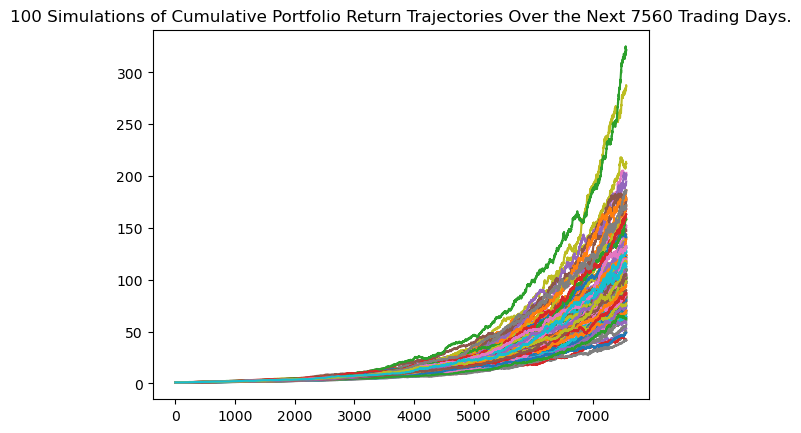

In [55]:
thirty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

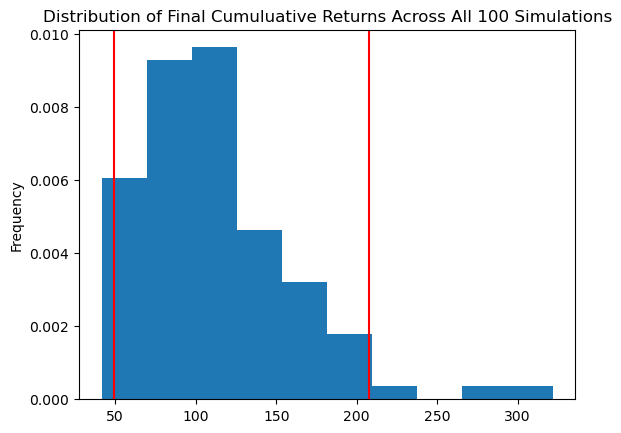

In [56]:
thirty_year_simulation.plot_distribution()

In [57]:
thirty_year_simulation_statistics = thirty_year_simulation.summarize_cumulative_return()
thirty_year_simulation_statistics

count           100.000000
mean            112.534779
std              48.505514
min              41.563697
25%              79.792626
50%             103.840958
75%             131.461105
max             321.675313
95% CI Lower     49.350825
95% CI Upper    207.757850
Name: 7560, dtype: float64